# Отчет по ОММ 

## Вариант №37

## Репченко Александр 342 группа



# 1. Постановка задачи

Используя метод переменных направлений, решите краевую задачу:

\begin{equation}
\begin{cases}
\dfrac{\partial u}{\partial t} = 4 \Delta u, 0 < x < 7, 0 < y < 5, t > 0\\
\dfrac{\partial u}{\partial x}\bigg|_{x=0} = u|_{x=7} = 0, \\
\dfrac{\partial u}{\partial y}\bigg|_{y=0} = \frac{\partial u}{\partial y}\bigg|_{y=5} = 0, \\
u|_{t=0} = cos(3 \pi x/14)cos(2\pi y).
\end{cases}
\end{equation}


# 2. Аналитическое решение

Исходя из знаний курса методов математической физики получаем, что аналитическое решение данной задачи следующее:

\begin{equation}
u(x,y,t) =  exp\left[-4t\left(\left(\frac{3\pi}{14}\right)^2 + \left(2\pi\right)^2\right)\right]cos\left(\frac{3\pi x}{14}\right)cos\left(2\pi y\right)
\end{equation}



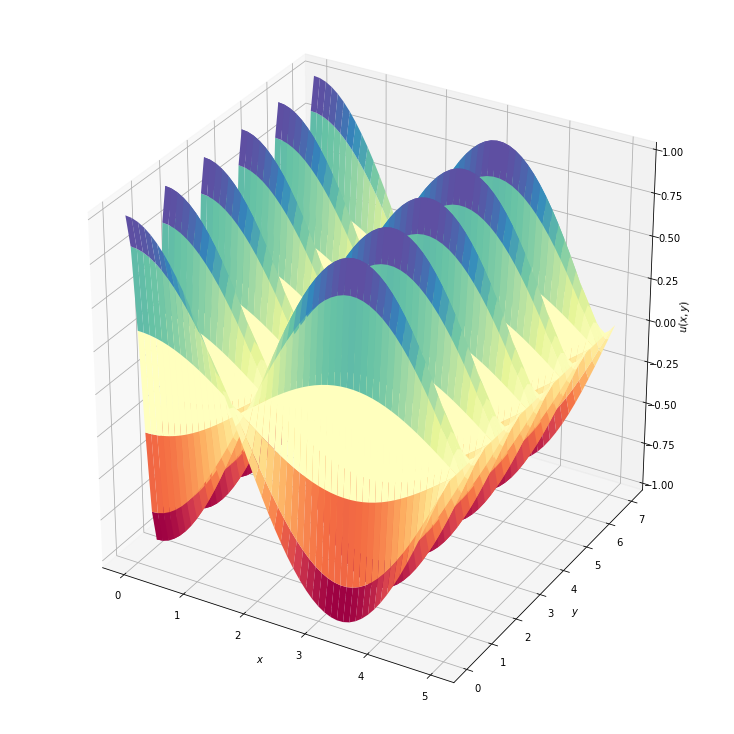

					Рис. 1 Аналитическое решение для t=0




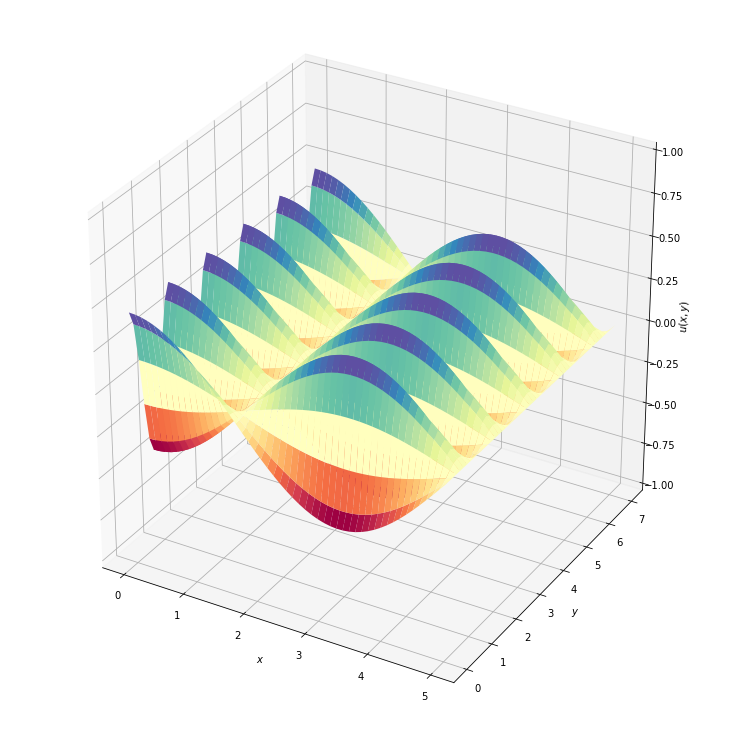

					Рис. 2 Аналитическое решение для t=0.005




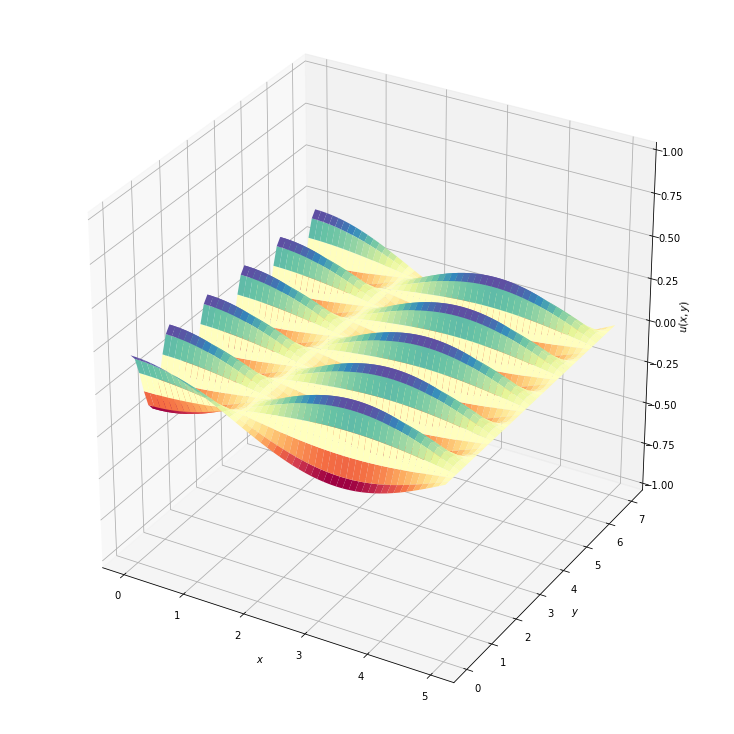

					Рис. 3 Аналитическое решение для t=0.01




In [4]:
import numpy as np
import math as mt
from mpl_toolkits.mplot3d import Axes3D
import pylab

# Функция, возвращающая значение U(x, y, t) аналитического решения
def u_analitic(x, y, t):
    return mt.cos(2*mt.pi*y)*mt.cos(3*mt.pi*x/14)*mt.exp(-4*t*(mt.pow(3*mt.pi/14, 2)+mt.pow(2*mt.pi, 2)))

# Функция. которая в узлы сетки NxMxK присваивает значения U(x,y,t)
def analitic_solve(a, b, c, d, T_0, T, N, M, K):
    U = np.zeros((N + 1, M + 1, K + 1))

    for n in range(0, N+1):
            for m in range(0, M+1):
                for k in range(0, K+1):
                    U[k][n][m] = u_analitic(a + (b-a) * n / N, c + (d-c) * m / M, T_0 + (T-T_0) *k / K)

    return U

# Функция, которая рисует графики U(x,y) от временного слоя k
def draw_graph_t(a, b, c, d, N, M, k, U):
    x = np.linspace(a, b, N + 1) 
    y = np.linspace(c, d, M + 1) 
    y, x = np.meshgrid(x, y)

    
    fig = pylab.figure(figsize=(10, 10))
    axes = Axes3D(fig)
    axes.set(xlabel=r'$x$', ylabel=r'$y$', zlabel=r'$u(x,y)$', zlim=[-1, 1])
    axes.plot_surface(x, y, U[k], rstride=1, cstride=1, cmap='Spectral')
    pylab.show()
    
U = analitic_solve(0, 7, 0, 5, 0, 0.01, 50, 50, 50)


draw_graph_t(0, 7, 0, 5, 50, 50, 0, U)   # Первый график для t=0
print('\t\t\t\t\tРис. 1 Аналитическое решение для t=0\n\n')
draw_graph_t(0, 7, 0, 5, 50, 50, 25, U)  # Второй график для t=0.005
print('\t\t\t\t\tРис. 2 Аналитическое решение для t=0.005\n\n')
draw_graph_t(0, 7, 0, 5, 50, 50, 50, U)  # Третий график для t=0.01
print('\t\t\t\t\tРис. 3 Аналитическое решение для t=0.01\n\n')


#################################################################################################3

# Функция, которая рисует графики U(x,y) от слоя k по X
def draw_graph_x(c, d, T_0, T, N, M, k, U):
    y = np.linspace(c, d, N + 1) 
    t = np.linspace(T_0, T, M + 1) 
    t,y = np.meshgrid(y, t)

    fig = pylab.figure(figsize=(10, 10))
    axes = Axes3D(fig)
    axes.set(xlabel=r'$y$', ylabel=r'$t$', zlabel=r'$u(y,t)$', zlim=[-1, 1])
    axes.plot_surface(t, y, U[:,k,:], rstride=1, cstride=1, cmap='Spectral')
    pylab.show()

# Функция, которая рисует графики U(x,y) от слоя k по Y
def draw_graph_y(c, d, T_0, T, N, M, k, U):
    x = np.linspace(c, d, N + 1) 
    t = np.linspace(T_0, T, M + 1) 
    t,x = np.meshgrid(x, t)
    
    fig = pylab.figure(figsize=(10, 10))
    axes = Axes3D(fig)
    axes.set(xlabel=r'$x$', ylabel=r'$t$', zlabel=r'$u(x,t)$', zlim=[-1, 1])
    axes.plot_surface(t, x, U[:,:,k], rstride=1, cstride=1, cmap='Spectral')
    pylab.show()

# 3. Решение с помощью численных методов


Введем сетку $X_N\times Y_M \times T_K$ следующим образом:

\begin{equation}
\label{l2}
\begin{aligned}
&X_N = \{x_n: x_n = 0+nh_x,~0\leqslant n \leqslant N,~h_x=(7-0)/N\},\\[1ex]
&Y_M = \{y_m: y_m = 0+nh_y,~0\leqslant m \leqslant M,~h_y=(5-0)/M\},\\[1ex]
&T_K = \{t_k: t_k = 0+k\tau,~0\leqslant k \leqslant K,~\tau=0.01/K\}.
\end{aligned}
\end{equation}

Тогда с точностью  $O(h_x^2)$ и $O(h_y^2)$ можно апроксимировать первые производные на границе и вторые производные в уравнении теплопроводности.

\begin{equation}
\Lambda_1 u =\dfrac{\partial^2 u}{\partial x^2} \to \frac{u_{n + 1, m} - 2u_{n,m} + u_{n-1,m}}{h_x^2},
\Lambda_2 u =\dfrac{\partial^2 u}{\partial y^2} \to \frac{u_{n, m+1} - 2u_{n,m} + u_{n,m-1}}{h_y^2}, \\
\dfrac{\partial u}{\partial x}\bigg|_{x=0} \to \frac{-3u_{0,m} + 4u_{1,m} - u_{2,m}}{2h_x},
\dfrac{\partial u}{\partial y}\bigg|_{y=0} \to \frac{-3u_{n,0} + 4u_{n,1} - u_{n,2}}{2h_x}.
\end{equation}

Воспользуемся схемой переменных направлений, переходя с временного слоя $𝑘$ на $𝑘 + 1$ в два этапа через вспомогательный
слой $𝑘 + \frac{1}{2}$

Вводим нашу схему для $x$ неявно и для $y$ явно. Тогда:

\begin{equation}
\label{l4}
\begin{cases}
\dfrac{u^{k+\frac{1}{2}}_{n,m} - u^{k}_{n,m}}{\tau/2} = 
4 \left( \dfrac{u^{k+\frac{1}{2}}_{n+1,m}-2u^{k+\frac{1}{2}}_{n,m}+u^{k+\frac{1}{2}}_{n-1,m}}{h_x^2} + \dfrac{u^{k}_{n,m+1}-2u^{k}_{n,m}+u^{k}_{n,m-1}}{h_y^2}\right),~n=\overline{1, N-1},~m=\overline{1,M-1},\\[3.5ex]
\dfrac{-3u^{k+\frac{1}{2}}_{0,m} + 4u^{k+\frac{1}{2}}_{1,m} - u^{k+\frac{1}{2}}_{2,m}}{2h_x}= 0,~m=\overline{1,M-1},\\[3.5ex]
u^{k+\frac{1}{2}}_{N,m} = 0,~m=\overline{1,M-1}.
\end{cases}
\end{equation}

Выражаем $u^{k+\frac{1}{2}}_{0,m}$ и $u^{k+\frac{1}{2}}_{N,m}$ используя граничные условия

Получается:

\begin{equation}
u^{k+\frac{1}{2}}_{0,m} = \frac{4u^{k+\frac{1}{2}}_{1,m} - u^{k+\frac{1}{2}}_{2,m}}{3},
u^{k+\frac{1}{2}}_{N,m} = 0.
\end{equation}

Тогда нашу систему уравнений можно коротко переписать следующим образом (не считая значения на границах):

\begin{equation}
\label{l6}
{A_n} u^{k+\frac{1}{2}}_{n-1,m} + {B_n} u^{k+\frac{1}{2}}_{n,m} + {C_n} u^{k+\frac{1}{2}}_{n+1,m} = {F_{n}},~n=\overline{1,N-1},
\end{equation}

Где коэффициенты определяются следующим образом:

\begin{equation}
\label{l7}
A_n =
\begin{cases}
0,\\[2ex]
\dfrac{4}{h_x^2},\\[2ex]
\dfrac{4}{h_x^2},
\end{cases}
B_n =
\begin{cases}
-\dfrac{8}{3h_x^2} - \dfrac{1}{\tau/2},\\[2ex]
-\dfrac{8}{h_x^2} - \dfrac{1}{\tau/2},\\[2ex]
-\dfrac{8}{h_x^2} - \dfrac{1}{\tau/2},
\end{cases}
C_n =
\begin{cases}
\dfrac{8}{3h_x^2},&~n=1,\\[2.5ex]
\dfrac{4}{h_x^2},&~n=\overline{2, N-2},\\[2.5ex]
0,&~n=N-1,
\end{cases}
\end{equation}

\begin{equation}
\notag
F_{n} = -\dfrac{u^{k}_{n,m}}{\tau/2} - 4\dfrac{u^{k}_{n,m+1}-2u^{k}_{n,m}+u^{k}_{n,m-1}}{h_y^2},~n=\overline{1, N-1}.
\end{equation}

Решая для $m=\overline{1,M-1}$, находим решение на сеточном слое $k+\frac{1}{2}$ с помощью слоя $k$.

Аналогично происходит переход из слоя $k + \frac{1}{2}$ в слой $k + 1$ Только теперь схема вводится явно для $x$ и неявно для $y$: 

\begin{equation}
\label{l8}
\begin{cases}
\dfrac{u^{k+1}_{n,m} - u^{k+\frac{1}{2}}_{n,m}}{\tau/2} = 4\left(  \dfrac{u^{k+\frac{1}{2}}_{n+1,m}-2u^{k+\frac{1}{2}}_{n,m}+u^{k+\frac{1}{2}}_{n-1,m}}{h_x^2} + \dfrac{u^{k+1}_{n,m+1}-2u^{k+1}_{n,m}+u^{k+1}_{n,m-1}}{h_y^2}\right) ,~n=\overline{1, N-1},~m=\overline{1,M-1},\\[3.5ex]
\dfrac{-3u^{k+1}_{n,0}+4u^{k+1}_{n,1}-u^{k+1}_{n,2}}{2h_y} = 0,~n=\overline{1,N-1},\\[3.5ex]
\dfrac{3u^{k+1}_{n,M}-4u^{k+1}_{n,M-1}+u^{k+1}_{n,M-2}}{2h_y} = 0,~n=\overline{1,N-1}.
\end{cases}
\end{equation}

Выражаем $u^{k+1}_{n,0}$ и $u^{k+1}_{n,M}$ используя граничные условия

Получается:

\begin{equation}
u^{k+1}_{n,0} = \frac{4u^{k+1}_{n,1} - u^{k+1}_{n,2}}{3},
u^{k+1}_{n,M} = \frac{4u^{k+1}_{n,M-1} - u^{k+1}_{n,M+2}}{3}.
\end{equation}

Аналогично можно представить систему уравнений как:

\begin{equation}
\label{l10}
A_m u^{k+1}_{n,m-1} + B_m u^{k+1}_{n,m} + C_m u^{k+1}_{n,m+1} = F_{m},~m=\overline{1,M-1},
\end{equation}

Где коэффициенты следующие:
\begin{equation}
\label{l11}
A_m =
\begin{cases}
0,\\[2ex]
\dfrac{4}{h_y^2},\\[2ex]
\dfrac{8}{3h_y^2},
\end{cases}
B_m =
\begin{cases}
-\dfrac{8}{3h_y^2} - \dfrac{1}{\tau/2},\\[2ex]
-\dfrac{8}{h_y^2} - \dfrac{1}{\tau/2},\\[2ex]
-\dfrac{8}{3h_y^2} - \dfrac{1}{\tau/2},
\end{cases}
C_m =
\begin{cases}
\dfrac{8}{3h_y^2},&~m=1,\\[2.5ex]
\dfrac{4}{h_y^2},&~m=\overline{2, M-2},\\[2.5ex]
0,&~m=M-1,
\end{cases}
\end{equation}

\begin{equation}
F_m =
-\dfrac{u^{k+\frac{1}{2}}_{n,m}}{\tau/2} - 4\dfrac{u^{k+\frac{1}{2}}_{n+1,m}-2u^{k+\frac{1}{2}}_{n,m}+u^{k+\frac{1}{2}}_{n-1,m}}{h_x^2},~m=\overline{1, M-1}.
\end{equation}

Таким образом, решая для $n=\overline{1,N-1}$, можно перейти из слоя $k+\frac{1}{2}$ в слой $k+1$. Продолжая итерации можно построить решение на всей временной прямой.


# 4. Устойчивость схемы

Обозначим через $\omega^k_{n,m}$ решение разностной схемы в слое $k$ и значении $(x_n, y_m)$. Тогда решение задачи для анализа схемы удобно представить в следующем виде:

$\left(E-\dfrac{\tau \Lambda_1}{2}\right)\left(E-\dfrac{\tau \Lambda_2}{2}\right) \omega_t = (\Lambda_1 + \Lambda_2)\omega^k$, где $E$ - единичный оператор, а $\omega_t = \dfrac{\omega^{k+1}-\omega^k}{\tau}$

Исследуем схему переменных направлений на устойчивость по начальным данным методом гармоник. Рассмотрим задачу Коши для данного уравнения с следующими начальным условием:

$\omega^0_{n,m}=e^{i(ax_n+by_m)}=e^{i(\alpha_a n+\beta_b m)}$, где $a$ и $b$ $-$ произвольные числа, а $\alpha_a = ah_x$ и $\beta_b = bh_y$.

Тогда на слое $k$ решение такой задачи Коши будет иметь вид: 

$\omega^k_{n,m} = \lambda^k_{a,b}e^{i(\alpha_a n+\beta_b m)}$, где $\lambda^k_{a,b}$ $-$ множитель роста.

Найдем явный вид множителей роста, подставляя данное выражения в наше уравнение:

$\left(E-\dfrac{\tau \Lambda_1}{2}\right)\left(E-\dfrac{\tau \Lambda_2}{2}\right) \dfrac{\lambda^{k+1}_{a,b} - \lambda^k_{a,b} }{\tau}e^{i(\alpha_a n+\beta_b m)} = (\Lambda_1 + \Lambda_2)\lambda^k_{a,b}e^{i(\alpha_a n+\beta_b m)}$


$\Lambda_1 e^{i(\alpha_a n+\beta_b m)} = e^{i(\alpha_a n+\beta_b m)}\dfrac{e^{i\alpha_a}-2+e^{-i\alpha_a}}{h_x^2}=-e^{i(\alpha_a n+\beta_b m)}\dfrac{4}{h^2_x}sin^2\dfrac{\alpha_a}{2}$

$\Lambda_2 e^{i(\alpha_a n+\beta_b m)} = e^{i(\alpha_a n+\beta_b m)}\dfrac{e^{i\alpha_a}-2+e^{-i\alpha_a}}{h_y^2}=-e^{i(\alpha_a n+\beta_b m)}\dfrac{4}{h^2_y}sin^2\dfrac{\beta_b}{2}$

Тогда, подставляя данные результаты

$\dfrac{\lambda_{a,b}-1}{\tau}\left(1+\dfrac{2\tau}{h_x^2}sin^2\dfrac{\alpha_a}{2}\right)\left(1+\dfrac{2\tau}{h_y^2}sin^2\dfrac{\beta_b}{2}\right) = -4\left(\dfrac{1}{h_x^2}sin^2\dfrac{\alpha_a}{2}+\dfrac{1}{h_y^2}sin^2\dfrac{\beta_b}{2}\right)$

Получается, что

$\lambda_{a,b}=\dfrac{\left(1-\dfrac{2\tau}{h_x^2}sin^2\dfrac{\alpha_a}{2}\right)\left(1-\dfrac{2\tau}{h_y^2}sin^2\dfrac{\beta_b}{2}\right)}{\left(1+\dfrac{2\tau}{h_x^2}sin^2\dfrac{\alpha_a}{2}\right)\left(1+\dfrac{2\tau}{h_y^2}sin^2\dfrac{\beta_b}{2}\right)}$

Математический факт, что $\forall k, n>0$

$\bigg|\dfrac{1-nsin^2 k}{1+nsin^2 k}\bigg|\leqslant1$, значит и $|\lambda_{a,b}|\leqslant1$ для всех $a$ и $b$.

Следовательно, для нашей схемы выполнено спектральное условие устойчивости для любого соотношения шагов $\tau$, $h_x$, $h_y$.

# 5. Погрешность аппроксимации

Пусть $u$ $-$ точное решение, $w$ $-$ численное решение. Рассмотрим функцию $z=w-u$, которая является погрешностью. В начальный момент времени и на границе области решения $z=0$. Тогда внутри области $z$ удовлетворяет уравнению:

$\left(E-\dfrac{\tau\Lambda_1}{2}\right)\left(E-\dfrac{\tau\Lambda_2}{2}\right)z_t=(\Lambda_1+\Lambda_2)z^k+\varepsilon^{k+\frac{1}{2}}_{n,m}$,

где $\varepsilon$ - погрешность аппроксимации, которая выглядит следующим образом:

$\varepsilon^{k+\frac{1}{2}}_{n,m} = (\Lambda_1+\Lambda_2)u^k-\left(E-\dfrac{\tau\Lambda_1}{2}\right)\left(E-\dfrac{\tau\Lambda_2}{2}\right)u_t = \\ =\dfrac{\Lambda_1+\Lambda_2}{2}(u^k+u^{k+1}) - u_t - \underbrace{\dfrac{\tau^2}{4}\Lambda_1\Lambda_2 u_t}_{O(\tau^2)}$

Если $u(x,y,t)$ - гладкая и существует $M>)$, такое что:

$\left|\frac{\partial^{2} u}{\partial t^{2}}\right| \leqslant M,\left|\frac{\partial^{5} u}{\partial x^{2} \partial y^{2} \partial t}\right| \leqslant M,\left|\frac{\partial^{4} u}{\partial x^{4}}\right| \leqslant M,\left|\frac{\partial^{4} u}{\partial y^{4}}\right| \leqslant M$

в области расчета, то

$0.5\left(u^{k}+u^{k+1}\right)=u^{k+\frac{1}{2}}+O\left(\tau^{2}\right),$
$0.5 \Lambda\left(u^{k}+u^{k+1}\right)=\Lambda u^{k+\frac{1}{2}}+O\left(\tau^{2}\right)=\Delta u^{k+\frac{1}{2}}+O\left(h_{x}^{2}\right)+O\left(h_{y}^{2}\right)+O\left(\tau^{2}\right)$,

где $\Lambda = \Lambda_1+\Lambda_2$

$u_{t}=\left.\frac{\partial u}{\partial t}\right|_{t=t_{k+\frac{1}{2}}}+O\left(\tau^{2}\right)$

Заметим, что $\Lambda_1\Lambda_2 u_t$ ограничено. Получается, что

$\varepsilon_{n, m}^{k+\frac{1}{2}}=\underbrace{\left.\left(\Delta u-\frac{\partial u}{\partial t}\right)\right|_{\left(x_{n}, y_{m}, t_{k+\frac{1}{2}}\right)}}_{=0}+O\left(h_{x}^{2}\right)+O\left(h_{y}^{2}\right)+O\left(\tau^{2}\right)= \\ =O\left(h_{x}^{2}\right)+O\left(h_{y}^{2}\right)+O\left(\tau^{2}\right)$

Значит, наша схема сходится и имеет второй порядок точности по координатам и времени.

# 6. Код программы и результаты моделирования, а также график абсолютной погрешности

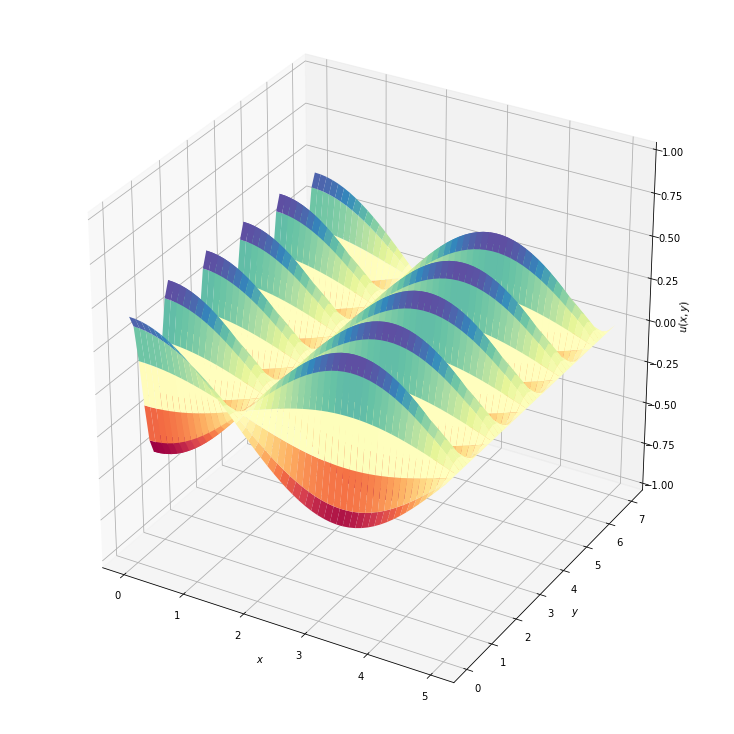

					Рис. 4 Численное решение для t=0.005




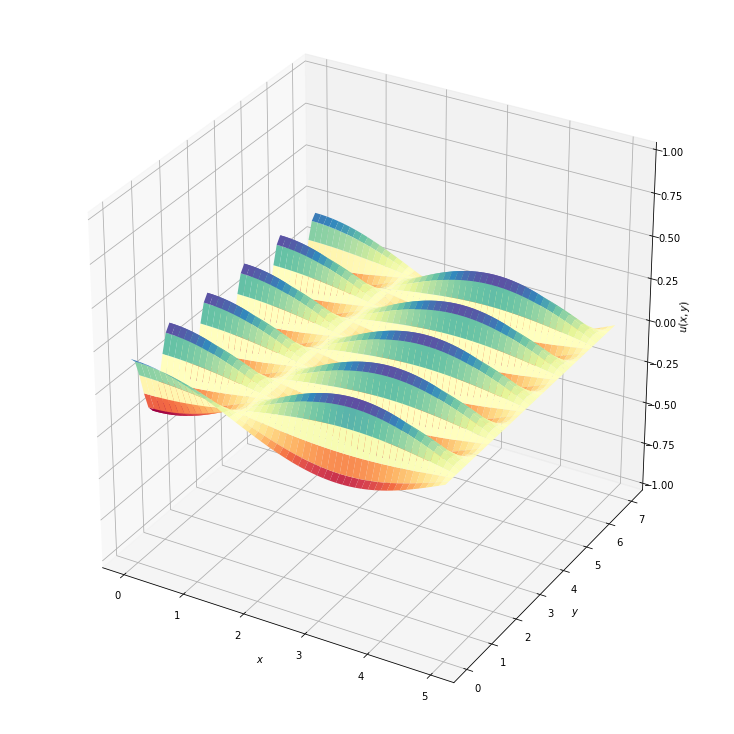

					Рис. 5 Численное решение для t=0.01




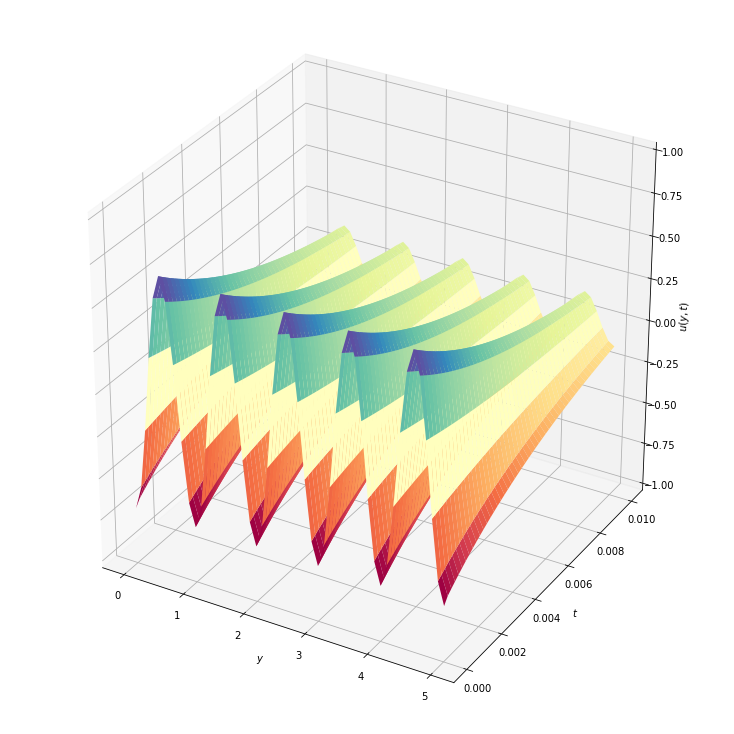

					Рис. 6 Численное решение для x=3.5




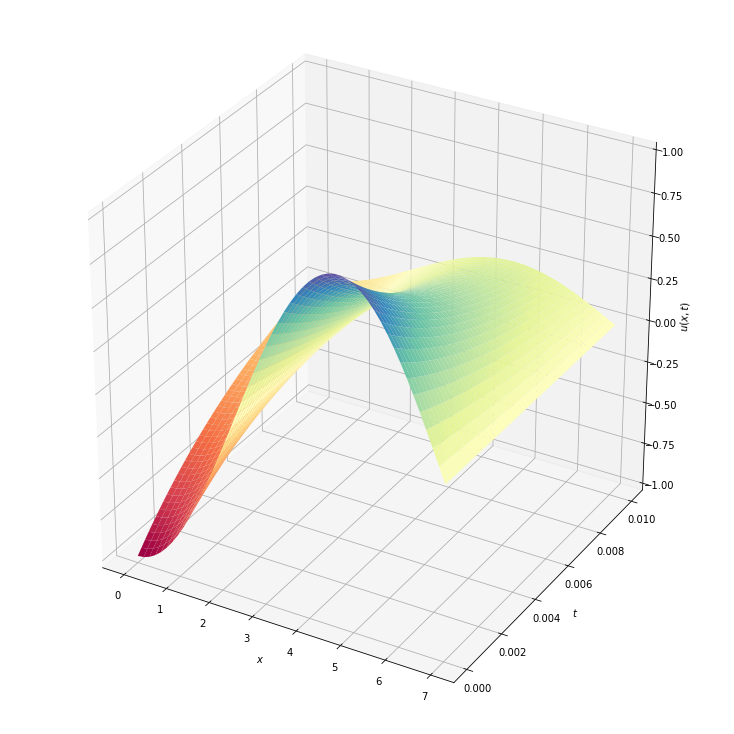

					Рис. 7 Численное решение для y=2.5




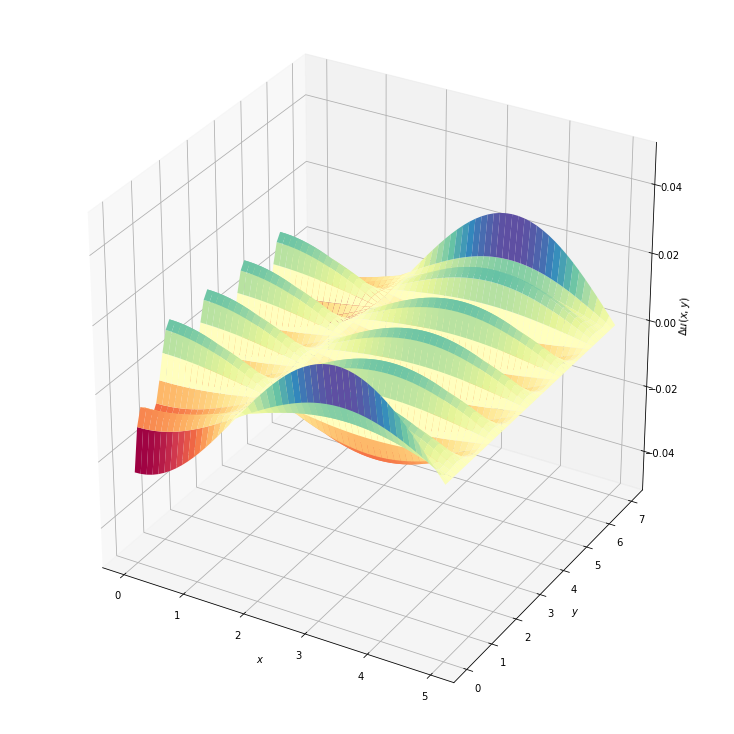

				Рис. 8 График абсолютной погрешности для t=0.005


In [5]:
def u_t0(x,y): return mt.cos(2*mt.pi*y)*mt.cos(3*mt.pi*x/14)

def tridiagonal_matrix_algorithm(n, A, B, C, F):
    X = np.zeros(n)

    for i in range(1, n):
        m = A[i] / B[i - 1]
        B[i] = B[i] - m * C[i - 1]
        F[i] = F[i] - m * F[i - 1]

    X[n - 1] = F[n - 1] / B[n - 1]

    for i in range(n - 2, -1, -1):
        X[i] = (F[i] - C[i] * X[i + 1]) / B[i]

    return X

def help_half_k(N, hx, hy, τ, U, A, B, C, F, m, k):
    A[0] = 0
    B[0] = -8 / mt.pow(hx, 2) / 3 - 1 / (τ / 2)
    C[0] = 8 / mt.pow(hx, 2) / 3
    F[0] = - U[k][1][m] / (τ / 2) - 4 * (U[k][1][m + 1] - 2 * U[k][1][m] + U[k][1][m - 1]) / mt.pow(hy, 2)

    for n in range(2, N - 1):
        A[n - 1] = 4 / mt.pow(hx, 2)
        B[n - 1] = -8 / mt.pow(hx, 2) - 1 / (τ / 2)
        C[n - 1] = 4 / mt.pow(hx, 2)
        F[n - 1] = - U[k][n][m] / (τ / 2) - 4 * (U[k][n][m + 1] - 2 * U[k][n][m] + U[k][n][m - 1]) / mt.pow(hy, 2)

    A[N - 2] = 4 / mt.pow(hx, 2)
    B[N - 2] = -8 / mt.pow(hx, 2) - 1 / (τ / 2)
    C[N - 2] = 0
    F[N - 2] = - U[k][N - 1][m] / (τ / 2) - 4 * (U[k][N - 1][m + 1] - 2 * U[k][N - 1][m] + U[k][N - 1][m - 1]) / mt.pow(hy, 2)

def help_k(M, hx, hy, τ, V, A, B, C, F, n, k):
    A[0] = 0
    B[0] = -8 / mt.pow(hy, 2) / 3 - 1 / (τ / 2)
    C[0] = 8 / mt.pow(hy, 2) / 3
    F[0] = - V[n][1] / (τ / 2) - 4 * (V[n + 1][1] - 2 * V[n][1] + V[n - 1][1]) / mt.pow(hx, 2)

    for m in range(2, M - 1):
        A[m - 1] = 4 / mt.pow(hy, 2)
        B[m - 1] = -8 / mt.pow(hy, 2) - 1 / (τ / 2)
        C[m - 1] = 4 / mt.pow(hy, 2)
        F[m - 1] = - V[n][m] / (τ / 2) - 4 * (V[n + 1][m] - 2 * V[n][m] + V[n - 1][m]) / mt.pow(hx, 2)

    A[M - 2] = 8 / mt.pow(hy, 2) / 3
    B[M - 2] = -8 / mt.pow(hy, 2) / 3 - 1 / (τ / 2)
    C[M - 2] = 0
    F[M - 2] = - V[n][M - 1] / (τ / 2) - 4 * (V[n + 1][M - 1] - 2 * V[n][M - 1] + V[n - 1][M - 1]) / mt.pow(hx, 2)

def solve(a, b, c, d, T_0, T, u_t0, N, M, K):
    U = np.zeros((K + 1, N + 1, M + 1))
    V = np.zeros((N + 1, M + 1))

    x = np.linspace(a, b, N + 1)
    y = np.linspace(c, d, M + 1)
    t = np.linspace(T_0, T, K + 1)

    hx = (b - a) / N
    hy = (d - c) / M
    τ = (T - T_0) / K

    for n in range(0, N + 1):
        for m in range(0, M + 1):
            U[0][n][m] = u_t0(x[n], y[m])

    for k in range(0, K):
        A = np.zeros(N - 1) 
        B = np.zeros(N - 1)
        C = np.zeros(N - 1)
        F = np.zeros(N - 1)
        
        for m in range(1, M):
            help_half_k(N, hx, hy, τ, U, A, B, C, F, m, k)
            
            X = tridiagonal_matrix_algorithm(N - 1, A, B, C, F)
            
            for n in range(1, N): 
                V[n][m] = X[n - 1] 
            V[0][m] = (4 * V[1][m] - V[2][m]) / 3
            V[N][m] = 0

        A = np.zeros(M - 1)
        B = np.zeros(M - 1)
        C = np.zeros(M - 1)
        F = np.zeros(M - 1)

        for n in range(1, N):
            help_k(M, hx, hy, τ, V, A, B, C, F, n, k)
            Y = tridiagonal_matrix_algorithm(M - 1, A, B, C, F)
            
            for m in range(1, M):
                U[k + 1][n][m] = Y[m - 1]
            U[k + 1][n][0] = (4 * U[k + 1][n][1] - U[k + 1][n][2]) / 3
            U[k + 1][n][M] = (4 * U[k + 1][n][M - 1] - U[k + 1][n][M - 2]) / 3
            
        for m in range(0, M + 1):
            U[k + 1][0][m] = (4 * U[k + 1][1][m] - U[k + 1][2][m]) / 3
            U[k + 1][N][m] = 0

    return U
    
U = solve(0, 7, 0, 5, 0, 0.01, u_t0, 50, 50, 50)

draw_graph_t(0, 7, 0, 5, 50, 50, 25, U)
print('\t\t\t\t\tРис. 4 Численное решение для t=0.005\n\n')
draw_graph_t(0, 7, 0, 5, 50, 50, 50, U)
print('\t\t\t\t\tРис. 5 Численное решение для t=0.01\n\n')
draw_graph_x(0, 5, 0, 0.01, 50, 50, 25, U)
print('\t\t\t\t\tРис. 6 Численное решение для x=3.5\n\n')
draw_graph_y(0, 7, 0, 0.01, 50, 50, 25, U)
print('\t\t\t\t\tРис. 7 Численное решение для y=2.5\n\n')

#############################################################################################################

U_analitic = analitic_solve(0, 7, 0, 5, 0, 0.01, 50, 50, 50)

ΔU = U-U_analitic

draw_graph_Δt(0, 7, 0, 5, 50, 50, 25, ΔU)
print('\t\t\t\tРис. 8 График абсолютной погрешности для t=0.005')

# 7. Вывод

В данном отчете продемонстрированно решение заданной задачи аналитическим и численным методом. Реализован метод прогонки, представлены соответсвующие графики, а также представлен график зависимости абсолютной погрешности от количества узлов в сетке.